In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import acos, sqrt, pi, cos, sin, exp, floor
import json
from bitstring import BitArray
import bitarray
import os

def cvtGrayscale(img):
    if len(img.shape) < 3:
        return img
    b, l, c = img.shape
    gray = np.zeros((b,l), dtype = "int64")
    for i in range(b):
        for j in range(l):
            gray[i][j] = (0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2])
    return gray

## Q6) Kalyan, who only uses discord wants to share the image shinchan.pkl, stored as a string, which is of size 15.4 MB to his friend. Discord only supports files of size less than 10 MB.

### 1) Help Kalyan to compress the color image using Huffman encoding to share the image to his friend.
### a) Create the dictionary of of all the letters in the image array.

In [28]:
def hist(img):
    b,l,c = img.shape
    hist = {}
    for i in range(b):
        for j in range(l):
            for k in range(c):
                x = img[i,j,k]
                if (x in hist.keys()):
                    hist[x] += 1
                else:
                    hist[x] = 1
    for i in hist.keys():
        hist[i]/= b*l*c
    return hist

### b) Generate the Huffman Tree from the tree generated by considering all the letters in the dictionary as the leaf nodes. Print the Huffman tree.

In [38]:
class node:
    def __init__(self, freq, value, left = None, right = None):
        self.left = left
        self.right = right
        self.freq = freq
        self.value = value
        
def encode(root, code=""):
    if root.value != -1:
        print(root.value, " - ", code)
        codes[root.value] = code
        return
    else:
        encode(root.left, code + "0")
        encode(root.right, code + "1")
    

def htree(f):
    nodes = [] # nodes list
    for i in f.items():
        nodes.append(node(i[1],i[0]))
    while (len(nodes)>1):
        nodes = sorted(nodes,key =lambda x: x.freq)
        left = nodes[0]
        right = nodes[1]
        parent = node(left.freq + right.freq, -1, left, right)
        nodes.append(parent)
        nodes.remove(left)
        nodes.remove(right)
    return nodes

img_shin = np.load("./../images/shinchan.pkl",allow_pickle=True)
img_shin = json.loads(img_shin)
img_shin = np.array(img_shin,'uint8')
histogram = hist(img_shin)
root = htree(histogram)
codes = ['']*256
encode(root[0])

1  -  000000
0  -  0000010
36  -  0000011000
35  -  0000011001
173  -  000001101000
159  -  000001101001
195  -  00000110101
244  -  0000011011
34  -  0000011100
68  -  00000111010
153  -  000001110110
75  -  000001110111
38  -  0000011110
19  -  0000011111
252  -  000010
44  -  0000110
25  -  0000111
188  -  0001
230  -  0010
229  -  0011000
208  -  00110010000
174  -  001100100010
120  -  001100100011
5  -  0011001001
121  -  001100101000
95  -  0011001010010
91  -  0011001010011
64  -  00110010101
179  -  00110010110
176  -  001100101110
152  -  001100101111
27  -  00110011
249  -  00110100
29  -  00110101
20  -  0011011000
190  -  0011011001
194  -  00110110100
122  -  001101101010
97  -  0011011010110
85  -  0011011010111
214  -  0011011011
33  -  0011011100
183  -  0011011101
147  -  00110111100
143  -  00110111101
220  -  0011011111
225  -  0011100000
180  -  00111000010
69  -  00111000011
23  -  001110001
227  -  001110010
247  -  001110011
251  -  0011101
123  -  001111000000


### 2) Display the image stored in the file shinchan.pkl. 

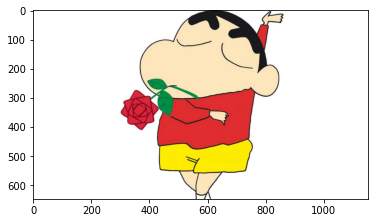

In [39]:
plt.imshow(img_shin)

### 3) Save the generated binary code of image in compressed.bin. This is supposed to be less than 10MB in size. He will be sharing this file to his friend.

In [41]:
def savebin(img):
    b,l,c = img.shape
    out = ""
    for i in range(b):
        for j in range(l):
            for k in range(c):
                out += codes[img[i][j][k]]
    delta = (8-len(out)%8)*'0'
    out = out + delta
    with open("./compressed.bin",'wb') as f:
        BitArray(bin=out).tofile(f)
    return len(out)
print("Compressed length = ", savebin(img_shin))

Compressed length =  6919776


### 4) Print the size of extracted text from shinchan.pkl and size of compressed.bin in MB.

In [43]:
full_size = os.path.getsize("./../images/shinchan.pkl")
comp_size = os.path.getsize("./compressed.bin")
print("Original  size- ", full_size*8)
print("After encoding- ", comp_size*8)

Original  size-  129288880
After encoding-  6919776


### 5) Write a function to help his friend decode the original image from compressed.bin and display it.

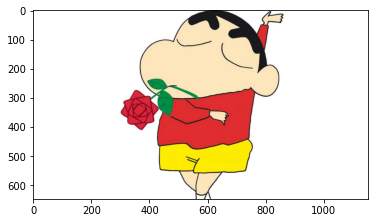

In [46]:
def decode(codes, img):
    b,l,c = img.shape
    out = np.zeros((b,l,c))
    connect = {}
    for i in range(256):
        if codes[i] != ' ':
            connect[codes[i]] = i
    temp = bitarray.bitarray()
    with open("compressed.bin",'rb') as f:
        temp.fromfile(f)
    codes = ''
    cnt = 0
    z = 0
    for i in range(b):
        for j in range(l):
            for k in range(c):
                temp1 = ''
                while temp1 not in connect.keys():
                    temp1 += str(temp[z])
                    z = z + 1
                out[i][j][k] = connect[temp1]
                cnt += 1
    return out.astype('uint8')

img_decomp = decode(codes,img_shin)
plt.imshow(img_decomp)

### 6) Verify if the image obtained after decoding and the original image are the same.

In [47]:
print(np.array_equal(img_shin, img_decomp))

True
